# Linear Regression From Scratch

#### Testing the sklearn baseline Function

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example dataset: simple linear relationship

np.random.seed(0)
X = np.random.rand(100, 1) * 10  # feature
y = 2.5 * X.squeeze() + np.random.randn(100) * 2  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print("sklearn Mean Squared Error:", mse)
print("sklearn Model Coefficient:", model.coef_[0])
print("sklearn Model Intercept:", model.intercept_)


sklearn Mean Squared Error: 4.173733526278072
sklearn Model Coefficient: 6.9716238056976305
sklearn Model Intercept: 12.817312454242531


### Custom Model (Using Gradient Descent)

In [2]:
class My_LinearRegression:
    def __init__(self,lr = 0.1,n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit (self,X,y):
        n_samples,n_features = X.shape 
        
        self.weights = np.zeros(n_features)
        self.bias = 0

        #Gradient Descent
        for _ in range(self.n_iters):
            y_pred = np.dot(X,self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T,(y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights -= self.lr*dw
            self.bias -= self.lr*db

    def predict(self,X):
        y_pred = np.dot(X,self.weights) + self.bias
        return y_pred  

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [3]:
reg = My_LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

print("Custom Implementation MSE:",mse(y_test,y_pred))
print("Custom Coefficient:",reg.weights[0])
print("Custom Intercept:",reg.bias)

Custom Implementation MSE: 4.173733526278063
Custom Coefficient: 6.971623805697628
Custom Intercept: 12.817312454242524


## Visualizing the Best Fit Line

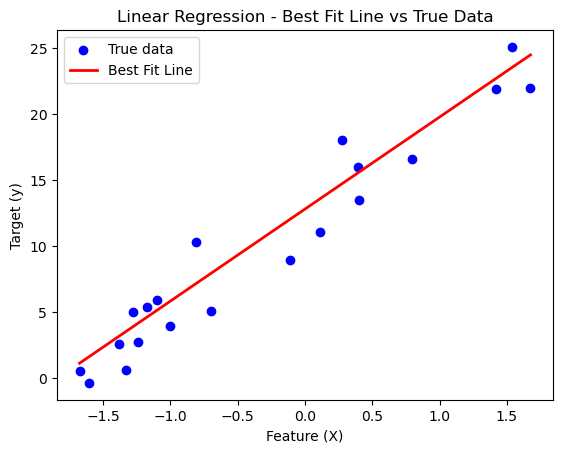

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='True data')

X_line = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_line = reg.predict(X_line)


plt.plot(X_line, y_line, color='red', linewidth=2, label='Best Fit Line')

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Regression - Best Fit Line vs True Data")
plt.legend()
plt.show()


# Custom Model (Using OLS)

In [5]:
import numpy as np

class OLS_LinearRegression:
    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.bias = self.theta[0]
        self.weights = self.theta[1:]
    
    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

In [6]:
ols_reg = OLS_LinearRegression()
ols_reg.fit(X_train,y_train)
y_pred = ols_reg.predict(X_test)

print("OLS Implementation MSE:",mse(y_test,y_pred))
print("OLS Coefficient:",ols_reg.weights[0])
print("OLS Intercept:",ols_reg.bias)

OLS Implementation MSE: 4.17373352627807
OLS Coefficient: 6.971623805697634
OLS Intercept: 12.817312454242531
